## LTE PDCP Cell Throughput Analysis
#### KPI Parameters analysed are Packet Data Convergence Protocal (PDCP),Physical Resource Block (PRB) ,Radio Resource Control (RRC) connected users & Modulation Coding  Scheme(MCS) 

##### 1.To check the correlation between the effect of increased PDCP context vs PRB ,MCS,RRC
##### 2.To create a model that predicts LTE cell throughputs for a given eNodeB by improving the selection of MCS and improving PRB utilisation 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_excel ("C:/Users/PENTACOM LTD/Desktop/ML/Datasets/PCL_4G-1.xlsx")

In [50]:
df.shape

(1110, 4)

In [51]:
df.head(5)

,DL PDCP Throughputs (kbps),DL PRB Usage Rate,Avg RRC Connected Users,MCS
0,25.1577,40.8614,45.3770,16.7001
1,12.8017,11.0116,6.5583,11.3374
2,16.8003,38.4192,23.1128,13.9115
3,11.3896,68.6771,33.3783,14.5171
4,7.1027,24.2239,11.8747,11.2193


In [54]:
df.isnull().sum()
df.dropna(subset=['DL PRB Usage Rate', 'DL PDCP Throughputs (kbps)','Avg RRC Connected Users' ,'MCS'], inplace=True)

#### Checking correlation between PDCP thps,PRBs, RRCs & MCS 

In [73]:
fig = plt.figure(figsize =(8,6))
sns.axes_style('darkgrid')

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<Figure size 800x600 with 0 Axes>

#DL PDCP thps vs DL PRB usage

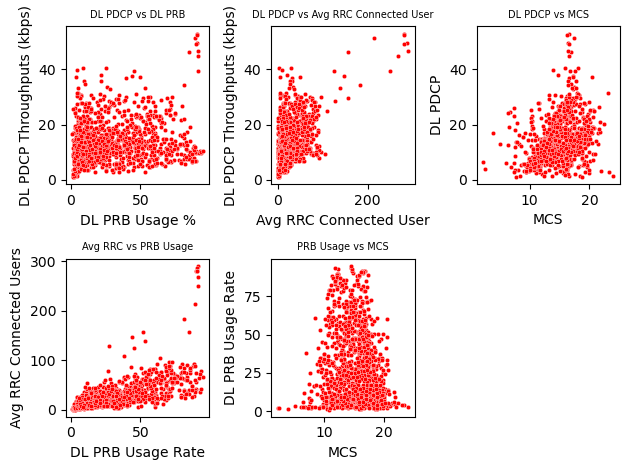

In [86]:
plt.subplot(2, 3, 1)
sns.scatterplot(x = 'DL PRB Usage Rate', y = 'DL PDCP Throughputs (kbps)', data = df, color = 'red',s=10)
sns.axes_style('darkgrid') 
plt.xlabel('DL PRB Usage %')
plt.ylabel('DL PDCP Throughputs (kbps)')
plt.title('DL PDCP vs DL PRB', fontsize=7)

#DL PDCP thps vs Avg RRC connected users
plt.subplot(2, 3, 2)
sns.scatterplot(x = 'Avg RRC Connected Users', y = 'DL PDCP Throughputs (kbps)', data = df, color = 'red',s=10)
sns.axes_style('darkgrid') 
plt.xlabel('Avg RRC Connected User')
plt.ylabel('DL PDCP Throughputs (kbps)')
plt.title('DL PDCP vs Avg RRC Connected User', fontsize=7)

#DL PDCP thps vs Modulation Coding Scheme
plt.subplot(2, 3, 3)
sns.scatterplot(x = 'MCS', y = 'DL PDCP Throughputs (kbps)', data = df, color = 'red',s=10)
sns.axes_style('darkgrid') 
plt.xlabel('MCS')
plt.ylabel('DL PDCP')
plt.title('DL PDCP vs MCS', fontsize= 7)

#Avg RRC Connected users vs PRB Usage rate
plt.subplot(2, 3, 4)
sns.scatterplot(x = 'DL PRB Usage Rate', y = 'Avg RRC Connected Users', data = df, color = 'red',s=10)
sns.axes_style('darkgrid') 
plt.xlabel('DL PRB Usage Rate')
plt.ylabel('Avg RRC Connected Users' )
plt.title('Avg RRC vs PRB Usage', fontsize= 7)

#Avg PRB Usage Rate vs MCS
plt.subplot(2, 3, 5)
sns.scatterplot(y = 'DL PRB Usage Rate', x = 'MCS', data = df, color = 'red',s=10)
sns.axes_style('darkgrid') 
plt.ylabel('DL PRB Usage Rate')
plt.xlabel('MCS' )
plt.title('PRB Usage vs MCS', fontsize= 7)


plt.tight_layout()
plt.show()


#### Heatmaps for further analysis 

In [107]:
KPI_corr = df.corr()

In [108]:
KPI_corr

,DL PDCP Throughputs (kbps),DL PRB Usage Rate,Avg RRC Connected Users,MCS
DL PDCP Throughputs (kbps),1.000000,0.150105,0.531063,0.337201
DL PRB Usage Rate,0.150105,1.000000,0.660425,-0.077452
Avg RRC Connected Users,0.531063,0.660425,1.000000,0.133750
MCS,0.337201,-0.077452,0.133750,1.000000


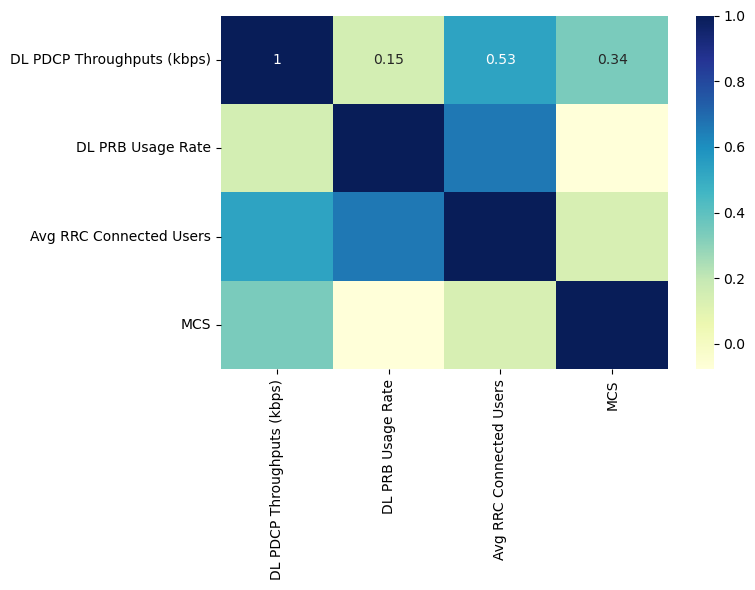

In [119]:
fig = plt.figure(figsize = (8, 6))
heatmap = sns.heatmap(KPI_corr, annot = True, cmap = 'YlGnBu')
plt.tight_layout()
fig.savefig('correlation.png')
plt.show()